In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

In [2]:
R = 40e6  #Ohm
C = 250e-12 #F

V_rep = -70e-3 #V
V_L = -50e-3   #V
V_redef = -65e-3   #V
V0 = V_rep  #V

tau_ref = 2e-3     #s
dt = 0.01e-3   #s
tmax = 2    #s

In [3]:
t = np.arange(0, tmax, dt)

interacoes = round(tmax/dt)

In [4]:
def solucao(v0, dt, interacoes, I, sigma):
    disparos = 0

    V = np.zeros(interacoes)
    V[0] = v0

    for i in range(interacoes-1):
        v = V[i]
        w_n = random.gauss(0, 1)

        if v >= V_L:
            V[i+1] = V_redef
            disparos += 1
        else:
            V[i+1] = v + dt * ( 1/R * (V_rep - v) + I[i] ) / C + ( sigma * w_n * np.sqrt(dt) )

    frequencia = disparos / tmax

    return V, disparos, frequencia

In [5]:
def corrente(t, I):
    return I*(t>=0)

In [6]:
def frequencia_corrente(sigma):
    valores_corrente = []
    valores_frequencia = []

    for i in range(400, 800, 20):
        I_inj = i*1e-12
        I = corrente(t, I_inj)

        V, disparos, frequencia = solucao(V0, dt, interacoes, I, sigma)

        valores_frequencia.append(frequencia)
        valores_corrente.append(I_inj)

    valores_corrente = np.array(valores_corrente)

    return valores_corrente, valores_frequencia

In [7]:
corrente0, frequencia0 = frequencia_corrente(sigma=0)

In [8]:
corrente1, frequencia1 = frequencia_corrente(sigma=20e-3)

In [9]:
corrente2, frequencia2 = frequencia_corrente(sigma=40e-3)

In [10]:
plt.style.use('bmh')

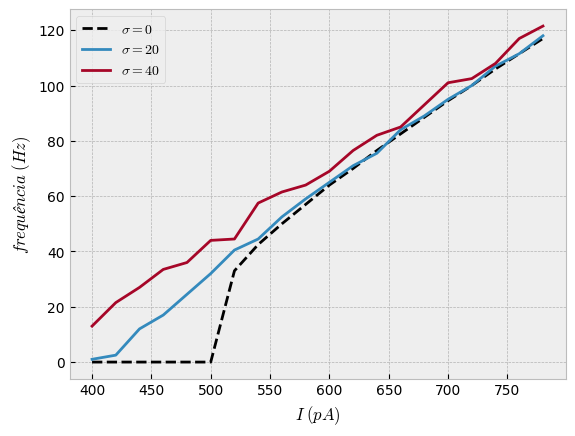

In [11]:
plt.figure()

plt.plot(corrente0*1e12, frequencia0, 'k--', label=r'$\sigma = 0$')
plt.plot(corrente1*1e12, frequencia1, label=r'$\sigma = 20$')
plt.plot(corrente2*1e12, frequencia2, label=r'$\sigma = 40$')


plt.legend()

plt.ylabel(r'$frequência \; (Hz)$')
plt.xlabel(r'$I \; (pA)$')


plt.show()